<a href="https://colab.research.google.com/github/UmiHidayah12/DataMining/blob/main/Analisis_Sentiment_Using_TOPSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install pustaka
!pip install Sastrawi
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving iranisrael.csv to iranisrael (1).csv


In [ ]:
# Load data
df = pd.read_csv(list(uploaded.keys())[0])
df = df.dropna(subset=['full_text'])

In [ ]:
# Inisialisasi
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

In [ ]:
# Fungsi preprocessing
def preprocess_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['full_text'].apply(preprocess_tweet)

In [ ]:
# Kata kunci sentimen
positif_words = [
    'damai','gencatan','rekonsiliasi','diplomasi','harapan','kerjasama','doa','kemanusiaan',
    'pemimpin','resolusi','pengampunan','solidaritas','empati','baik','saling','berhenti'
]

negatif_words = [
    'perang','serang','rudal','bom','invasi','genosida','kebencian','jahat','barbar','bunuh',
    'krisis','pembantaian','kematian','pendudukan','penderitaan','pelanggaran','radikal',
    'penghancuran','pembalasan','hipokrisi','konflik','hancur','rusak','teror','tembak'
]

In [ ]:
# Fungsi label
def label_sentimen(text):
    score = 0
    for word in text.split():
        if word in positif_words:
            score += 1
        elif word in negatif_words:
            score -= 1
    if score > 0:
        return 'positif'
    elif score < 0:
        return 'negatif'
    else:
        return 'netral'

df['label'] = df['clean_text'].apply(label_sentimen)
df['label'].value_counts()

,count
label,
negatif,118
netral,116
positif,13


/tmp/ipython-input-2942219640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


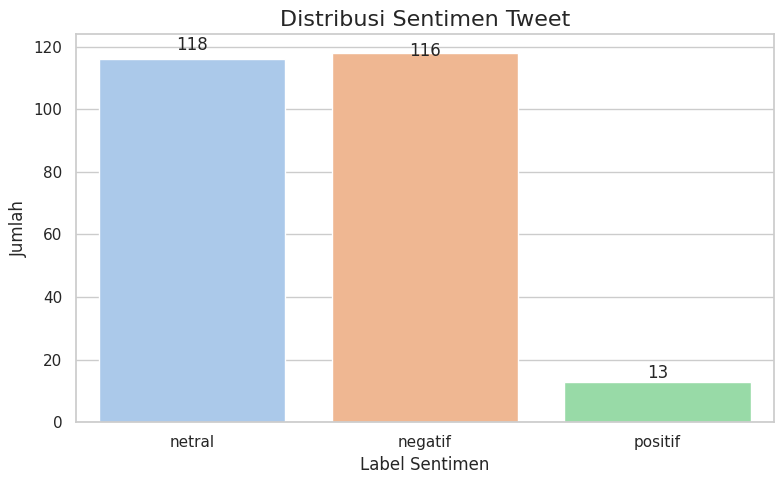

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='pastel')

plt.title('Distribusi Sentimen Tweet', fontsize=16)
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')

for index, value in enumerate(df['label'].value_counts()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

🔍 Akurasi: 86.00%

📊 Classification Report:
               precision    recall  f1-score   support

     negatif       0.88      0.91      0.89        23
      netral       0.85      0.92      0.88        24
     positif       0.00      0.00      0.00         3

    accuracy                           0.86        50
   macro avg       0.57      0.61      0.59        50
weighted avg       0.81      0.86      0.83        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


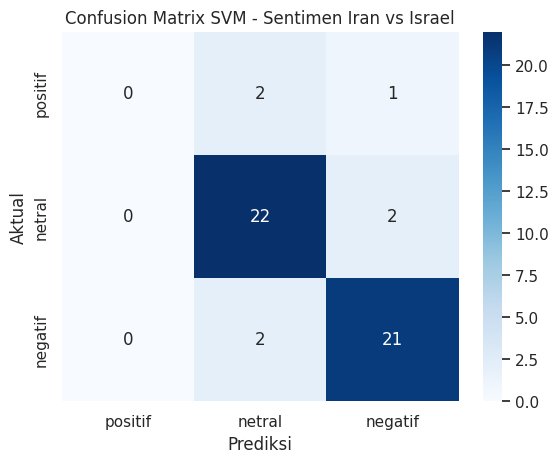

In [ ]:
print("🔍 Akurasi: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positif', 'netral', 'negatif'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positif', 'netral', 'negatif'],
            yticklabels=['positif', 'netral', 'negatif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix SVM - Sentimen Iran vs Israel')
plt.show()

In [ ]:
df.to_csv('data_dengan_label_svm.csv', index=False)
files.download('data_dengan_label_svm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>